# Asset Pricing 2: Homework 1
### Trent Potter  
### Winter 2025

---

### Outline
#### Data
* `StockPortfolios.csv`: monthly stock returns of 30 portfolios from 1963-10 to 2013-12 
* `FFMktFct.csv`: monthly broad market returns and tbills returns of 30 portfolios from 1963-10 to 2016-07 
#### Problem 1: Estimating an SDF with the Market Factor  
**Estimation Procedures**

Calculate SDF parameters ($b$ and $µ_F$), standard errors, $\chi^2$-statistics, and HJ-distance under three difference cases:  
   - **Assumption IID**: Equivalent to timeseries regression.   
   - **First-stage GMM**: Using $W=I$ weight matrix.  
   - **Two-step GMM**: Using optimal $W=S^{-1}$ weight matrix.  
Discussion follows.

#### Problem 2: Principal Component Factors in the SDF  
**Estimation Procedures**

Compute the first five principal components of the 30 portfolio excess returns, then re-run the above analysis.
   - **Assumption IID**: Equivalent to timeseries regression.   
   - **First-stage GMM**: Using $W=I$ weight matrix.  
   - **Two-step GMM**: Attempt optimal $W=S^{-1}$ weight matrix. 
     - Investigating invertibility of $S$ matrix  
     - Using pseudo-inverse of $S$
     - Without $K$ pricing factor moment conditions
       
**Analysis and Discussion**
   - Proof / Disproof on equivalence time-series regression and GMM on PCs as factors.
   - Explaining results from alternative approaches (pseudo-inverse and reduced moment conditions)  
   - Discussion of pseudo-inverse's impact on weighting  

In [23]:
import pandas as pd
import numpy as np
from numpy.linalg import inv as inv
from IPython.display import display
import matplotlib.pyplot as plt

In [92]:
# Read in the CSV files
stock_portfolios = pd.read_csv('StockPortfolios.csv', index_col=0, parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))
ff_mkt_fct = pd.read_csv('FFMktFct.csv', index_col=0, parse_dates=True, date_parser=lambda x: pd.to_datetime(x, format='%Y%m'))

# Truncate ff_mkt_fct to the same time period as stock_portfolios
ff_mkt_fct = ff_mkt_fct.loc[:'2013-12']

# Concatenate the two dataframes along the column axis
excess_rets = pd.concat([stock_portfolios/100, ff_mkt_fct], axis=1)

# Subtract the "Tbill" column from every other column
for column in excess_rets.columns:
  if column != 'Tbill':
    excess_rets[column] = excess_rets[column] - excess_rets['Tbill']
excess_rets.drop('Tbill', axis=1, inplace=True)

display(excess_rets)

,Size_Short,Size_Long,GrossProfitability_Short,GrossProfitability_Long,Value_Short,Value_Long,ValProf_Short,ValProf_Long,Accruals_Short,Accruals_Long,...,ValMom_Long,IdiosyncraticVolatility_Short,IdiosyncraticVolatility_Long,Momentum_Short,Momentum_Long,LongRunReversals_Short,LongRunReversals_Long,BetaArbitrage_Short,BetaArbitrage_Long,Rmarket
1963-10-01,0.032463,0.002461,-0.004584,0.009868,0.036586,0.002359,-0.012698,0.012893,0.000074,0.108780,...,0.009235,0.011343,0.037592,0.017417,0.049735,0.031614,-0.000686,0.019894,-0.006622,0.0253
1963-11-01,-0.008222,-0.023810,-0.005876,-0.017461,-0.001547,0.006253,-0.011268,-0.002491,-0.014230,-0.046343,...,0.015103,-0.026451,0.010058,-0.002067,-0.003162,0.010660,0.001016,-0.015385,-0.014604,-0.0085
1963-12-01,0.022975,-0.025874,0.019786,0.002957,0.024632,0.034328,0.021916,-0.016053,0.008949,0.014776,...,0.038384,-0.006328,0.020184,-0.027230,0.003959,0.011700,-0.008660,0.001978,0.013922,0.0183
1964-01-01,0.028174,0.040909,0.015660,0.008502,0.026102,0.025869,0.013848,0.024817,0.036162,0.032351,...,0.036172,-0.017914,0.034167,0.014552,0.014036,0.018061,0.042631,0.016988,0.010866,0.0224
1964-02-01,0.012056,0.024589,0.009282,0.015384,0.019295,0.058678,0.008917,0.042800,0.014362,0.022080,...,0.045774,0.013956,0.009185,0.017621,0.032145,0.015864,0.025818,0.013827,0.011335,0.0154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-01,-0.028161,-0.028445,-0.029218,-0.027918,-0.020403,-0.036744,-0.017783,-0.027745,-0.017260,-0.004716,...,-0.046895,0.006658,-0.044269,0.030058,-0.027014,-0.009481,-0.041519,-0.021062,-0.042002,-0.0271
2013-09-01,0.029641,0.064027,0.027408,0.058396,0.062613,0.023868,0.067279,0.079284,0.064899,0.071643,...,0.025438,0.083172,0.019955,0.005207,0.074028,0.043669,0.026614,0.078438,0.015960,0.0377
2013-10-01,0.047549,0.019437,0.015164,0.039823,0.038047,0.032301,0.027173,0.056679,0.015373,0.041395,...,0.034872,-0.010889,0.046610,0.051215,0.023634,0.046191,0.029992,0.017291,0.046490,0.0418
2013-11-01,0.033781,0.054427,-0.006936,0.021845,0.026063,0.053415,0.026901,0.019822,0.031135,0.023395,...,0.050488,0.028204,0.034729,0.032061,0.033515,0.041332,0.072986,0.044141,0.030308,0.0312


In [95]:
(1+ excess_rets).cumprod()

,Size_Short,Size_Long,GrossProfitability_Short,GrossProfitability_Long,Value_Short,Value_Long,ValProf_Short,ValProf_Long,Accruals_Short,Accruals_Long,...,ValMom_Long,IdiosyncraticVolatility_Short,IdiosyncraticVolatility_Long,Momentum_Short,Momentum_Long,LongRunReversals_Short,LongRunReversals_Long,BetaArbitrage_Short,BetaArbitrage_Long,Rmarket
1963-10-01,1.032463,1.002461,0.995416,1.009868,1.036586,1.002359,0.987302,1.012893,1.000074,1.108780,...,1.009235,1.011343,1.037592,1.017417,1.049735,1.031614,0.999314,1.019894,0.993378,1.025300
1963-11-01,1.023974,0.978592,0.989567,0.992235,1.034983,1.008627,0.976177,1.010370,0.985843,1.057396,...,1.024477,0.984593,1.048028,1.015314,1.046416,1.042611,1.000330,1.004203,0.978870,1.016585
1963-12-01,1.047499,0.953272,1.009147,0.995169,1.060477,1.043251,0.997571,0.994150,0.994665,1.073020,...,1.063801,0.978362,1.069182,0.987667,1.050558,1.054810,0.991667,1.006189,0.992498,1.035188
1964-01-01,1.077011,0.992270,1.024950,1.003630,1.088157,1.070239,1.011385,1.018822,1.030634,1.107732,...,1.102281,0.960835,1.105712,1.002039,1.065304,1.073862,1.033943,1.023283,1.003282,1.058377
1964-02-01,1.089996,1.016669,1.034464,1.019070,1.109153,1.133038,1.020404,1.062428,1.045436,1.132192,...,1.152737,0.974245,1.115869,1.019696,1.099548,1.090897,1.060637,1.037432,1.014654,1.074676
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2013-08-01,6.490841,23.091360,3.267203,35.122799,4.191412,71.763750,1.094268,156.028250,1.826148,11.848105,...,197.740588,0.048144,14.418482,0.031550,180.676653,3.389408,44.745801,1.904908,7.216808,9.314763
2013-09-01,6.683237,24.569835,3.356749,37.173825,4.453849,73.476611,1.167889,168.398725,1.944664,12.696936,...,202.770762,0.052148,14.706198,0.031714,194.051874,3.537421,45.936654,2.054326,7.331987,9.665930
2013-10-01,7.001019,25.047406,3.407651,38.654210,4.623305,75.850002,1.199624,177.943406,1.974559,13.222527,...,209.841848,0.051580,15.391658,0.033338,198.638050,3.700817,47.314386,2.089846,7.672851,10.069965
2013-11-01,7.237522,26.410672,3.384014,39.498603,4.743800,79.901561,1.231896,181.470555,2.036036,13.531869,...,220.436313,0.053035,15.926200,0.034407,205.295349,3.853780,50.767693,2.182094,7.905403,10.384148


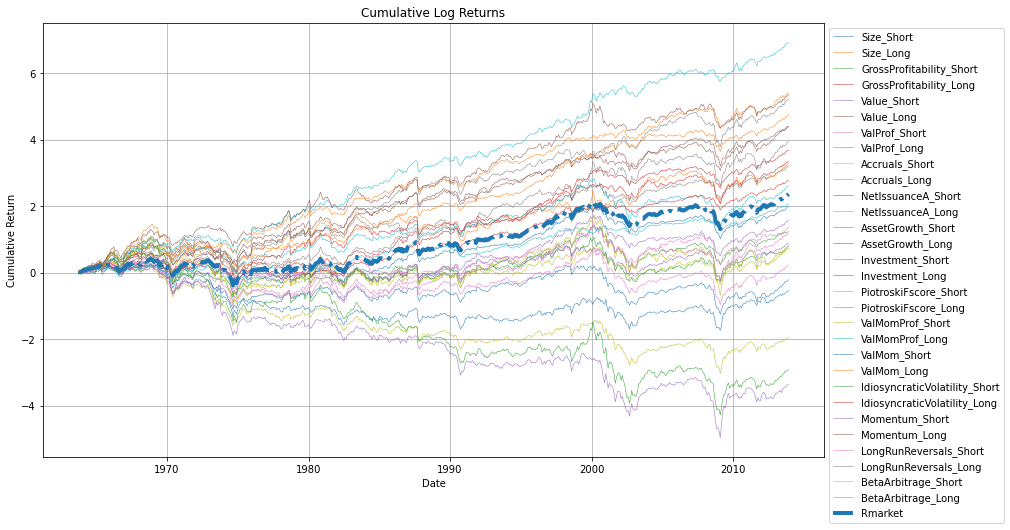

In [102]:
# Calculate cumulative returns
cumulative_log_returns = np.log((1+ excess_rets).cumprod())

# Plot cumulative returns
plt.figure(figsize=(14, 8))
for column in cumulative_log_returns.columns:
  if column == 'Rmarket':
    plt.plot(cumulative_log_returns.index, cumulative_log_returns[column], label=column, linewidth=4, linestyle='-.')
  else:
    plt.plot(cumulative_log_returns.index, cumulative_log_returns[column], label=column, linewidth=.5)

# Add legend
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.title('Cumulative Log Returns')
plt.xlabel('Date')
plt.ylabel('Cumulative Return')
plt.grid(True)
plt.show()

# Problem 1 - SDF Estimation w/ Market Factor

In [112]:
# Market Factor
F = excess_rets['Rmarket'] - excess_rets['Rmarket'].mean()
F= F.to_numpy().reshape(-1,1)
excess_rets.reset_index(drop=True, inplace=True)
# Approach 1: IID Assumption yields GMM equivalent to OLS
import statsmodels.api as sm
F_and_ones = sm.add_constant(F)
# Perform the regression for each column in excess_rets
results = {}
for column in excess_rets.columns:
  model = sm.OLS(excess_rets[column], F_and_ones).fit()
  results[column] = model.summary()

# Display the summary of the regression for the first column as an example
print(results[excess_rets.columns[-1]])


                            OLS Regression Results                            
Dep. Variable:                Rmarket   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 1.637e+35
Date:                Thu, 16 Jan 2025   Prob (F-statistic):               0.00
Time:                        18:43:53   Log-Likelihood:                 23533.
No. Observations:                 603   AIC:                        -4.706e+04
Df Residuals:                     601   BIC:                        -4.705e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0050   1.11e-19   4.47e+16      0.0

In [135]:
beta = inv(F.T@F)@F.T@excess_rets
alpha = (excess_rets.reset_index(drop=True) - (beta.T@F.T).T).mean()
alpha_beta = pd.concat([pd.Series(beta.T[0], index=excess_rets.columns, name='beta'), 
            pd.Series(alpha, index=excess_rets.columns, name='alpha')], axis=1)
display(alpha_beta)

,beta,alpha
Size_Short,0.928704,0.004252
Size_Long,1.114228,0.007575
GrossProfitability_Short,0.947408,0.003215
GrossProfitability_Long,0.932940,0.007236
Value_Short,1.071709,0.003979
Value_Long,0.985271,0.008752
ValProf_Short,1.192921,0.002049
ValProf_Long,1.061849,0.010287
Accruals_Short,1.265567,0.003161
Accruals_Long,1.125613,0.005945
